## Import some relevent libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


## Read the data from csv file

In [2]:
matches = pd.read_csv(r'C:\Users\Yash Kumar\Downloads\matches (3).csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Filling the values of city based on venue

In [6]:
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

#Removing records having null values in "winner" column
matches=matches[matches["winner"].notna()]

In [7]:
for team in matches['team1'].unique():
    print(team)
    

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiant
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants
Delhi Capitals


In [8]:
for s in matches['venue'].unique():
    print(s)
    

Rajiv Gandhi International Stadium, Uppal
Maharashtra Cricket Association Stadium
Saurashtra Cricket Association Stadium
Holkar Cricket Stadium
M Chinnaswamy Stadium
Wankhede Stadium
Eden Gardens
Feroz Shah Kotla
Punjab Cricket Association IS Bindra Stadium, Mohali
Green Park
Punjab Cricket Association Stadium, Mohali
Sawai Mansingh Stadium
MA Chidambaram Stadium, Chepauk
Dr DY Patil Sports Academy
Newlands
St George's Park
Kingsmead
SuperSport Park
Buffalo Park
New Wanderers Stadium
De Beers Diamond Oval
OUTsurance Oval
Brabourne Stadium
Sardar Patel Stadium, Motera
Barabati Stadium
Vidarbha Cricket Association Stadium, Jamtha
Himachal Pradesh Cricket Association Stadium
Nehru Stadium
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Subrata Roy Sahara Stadium
Shaheed Veer Narayan Singh International Stadium
JSCA International Stadium Complex
Sheikh Zayed Stadium
Sharjah Cricket Stadium
Dubai International Cricket Stadium
M. A. Chidambaram Stadium
Feroz Shah Kotla Ground
M. Chinnasw

## Replacing the Rising Pune Supergiant with Rising Pune Supergiants

In [9]:
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

## Feature Engineering

## encoding the numeric values

In [10]:
encoder= preprocessing.LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

## outcome variable team1_win as a probability of team1 winning the match

In [11]:
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0


### outcome variable team1_toss_win as a value of team1 winning the toss

In [12]:
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

### outcome variable team1_bat to depict if team1 bats first

In [13]:
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1

## Data Visualisation

In [14]:
#Toss affecting the win dataframe
toss_win_result = matches.groupby(['toss_winner']).winner.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.winner==toss_win_result.toss_winner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['toss_winner','result'])['count'].sum().reset_index()

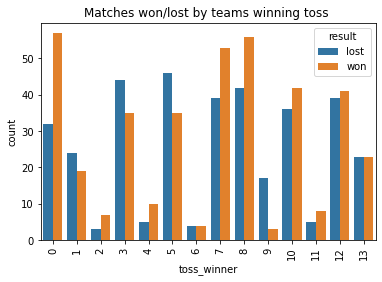

In [15]:
#Visualization
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_win_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_win_result_df['toss_winner'].unique(),rotation=90)
plt.show()

In [16]:
#Winning stats of teams bat/field first by venues 
venue_toss_decision_result=matches[["toss_winner","toss_decision","winner","venue"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue"]).decision.value_counts().reset_index(name="count")

C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


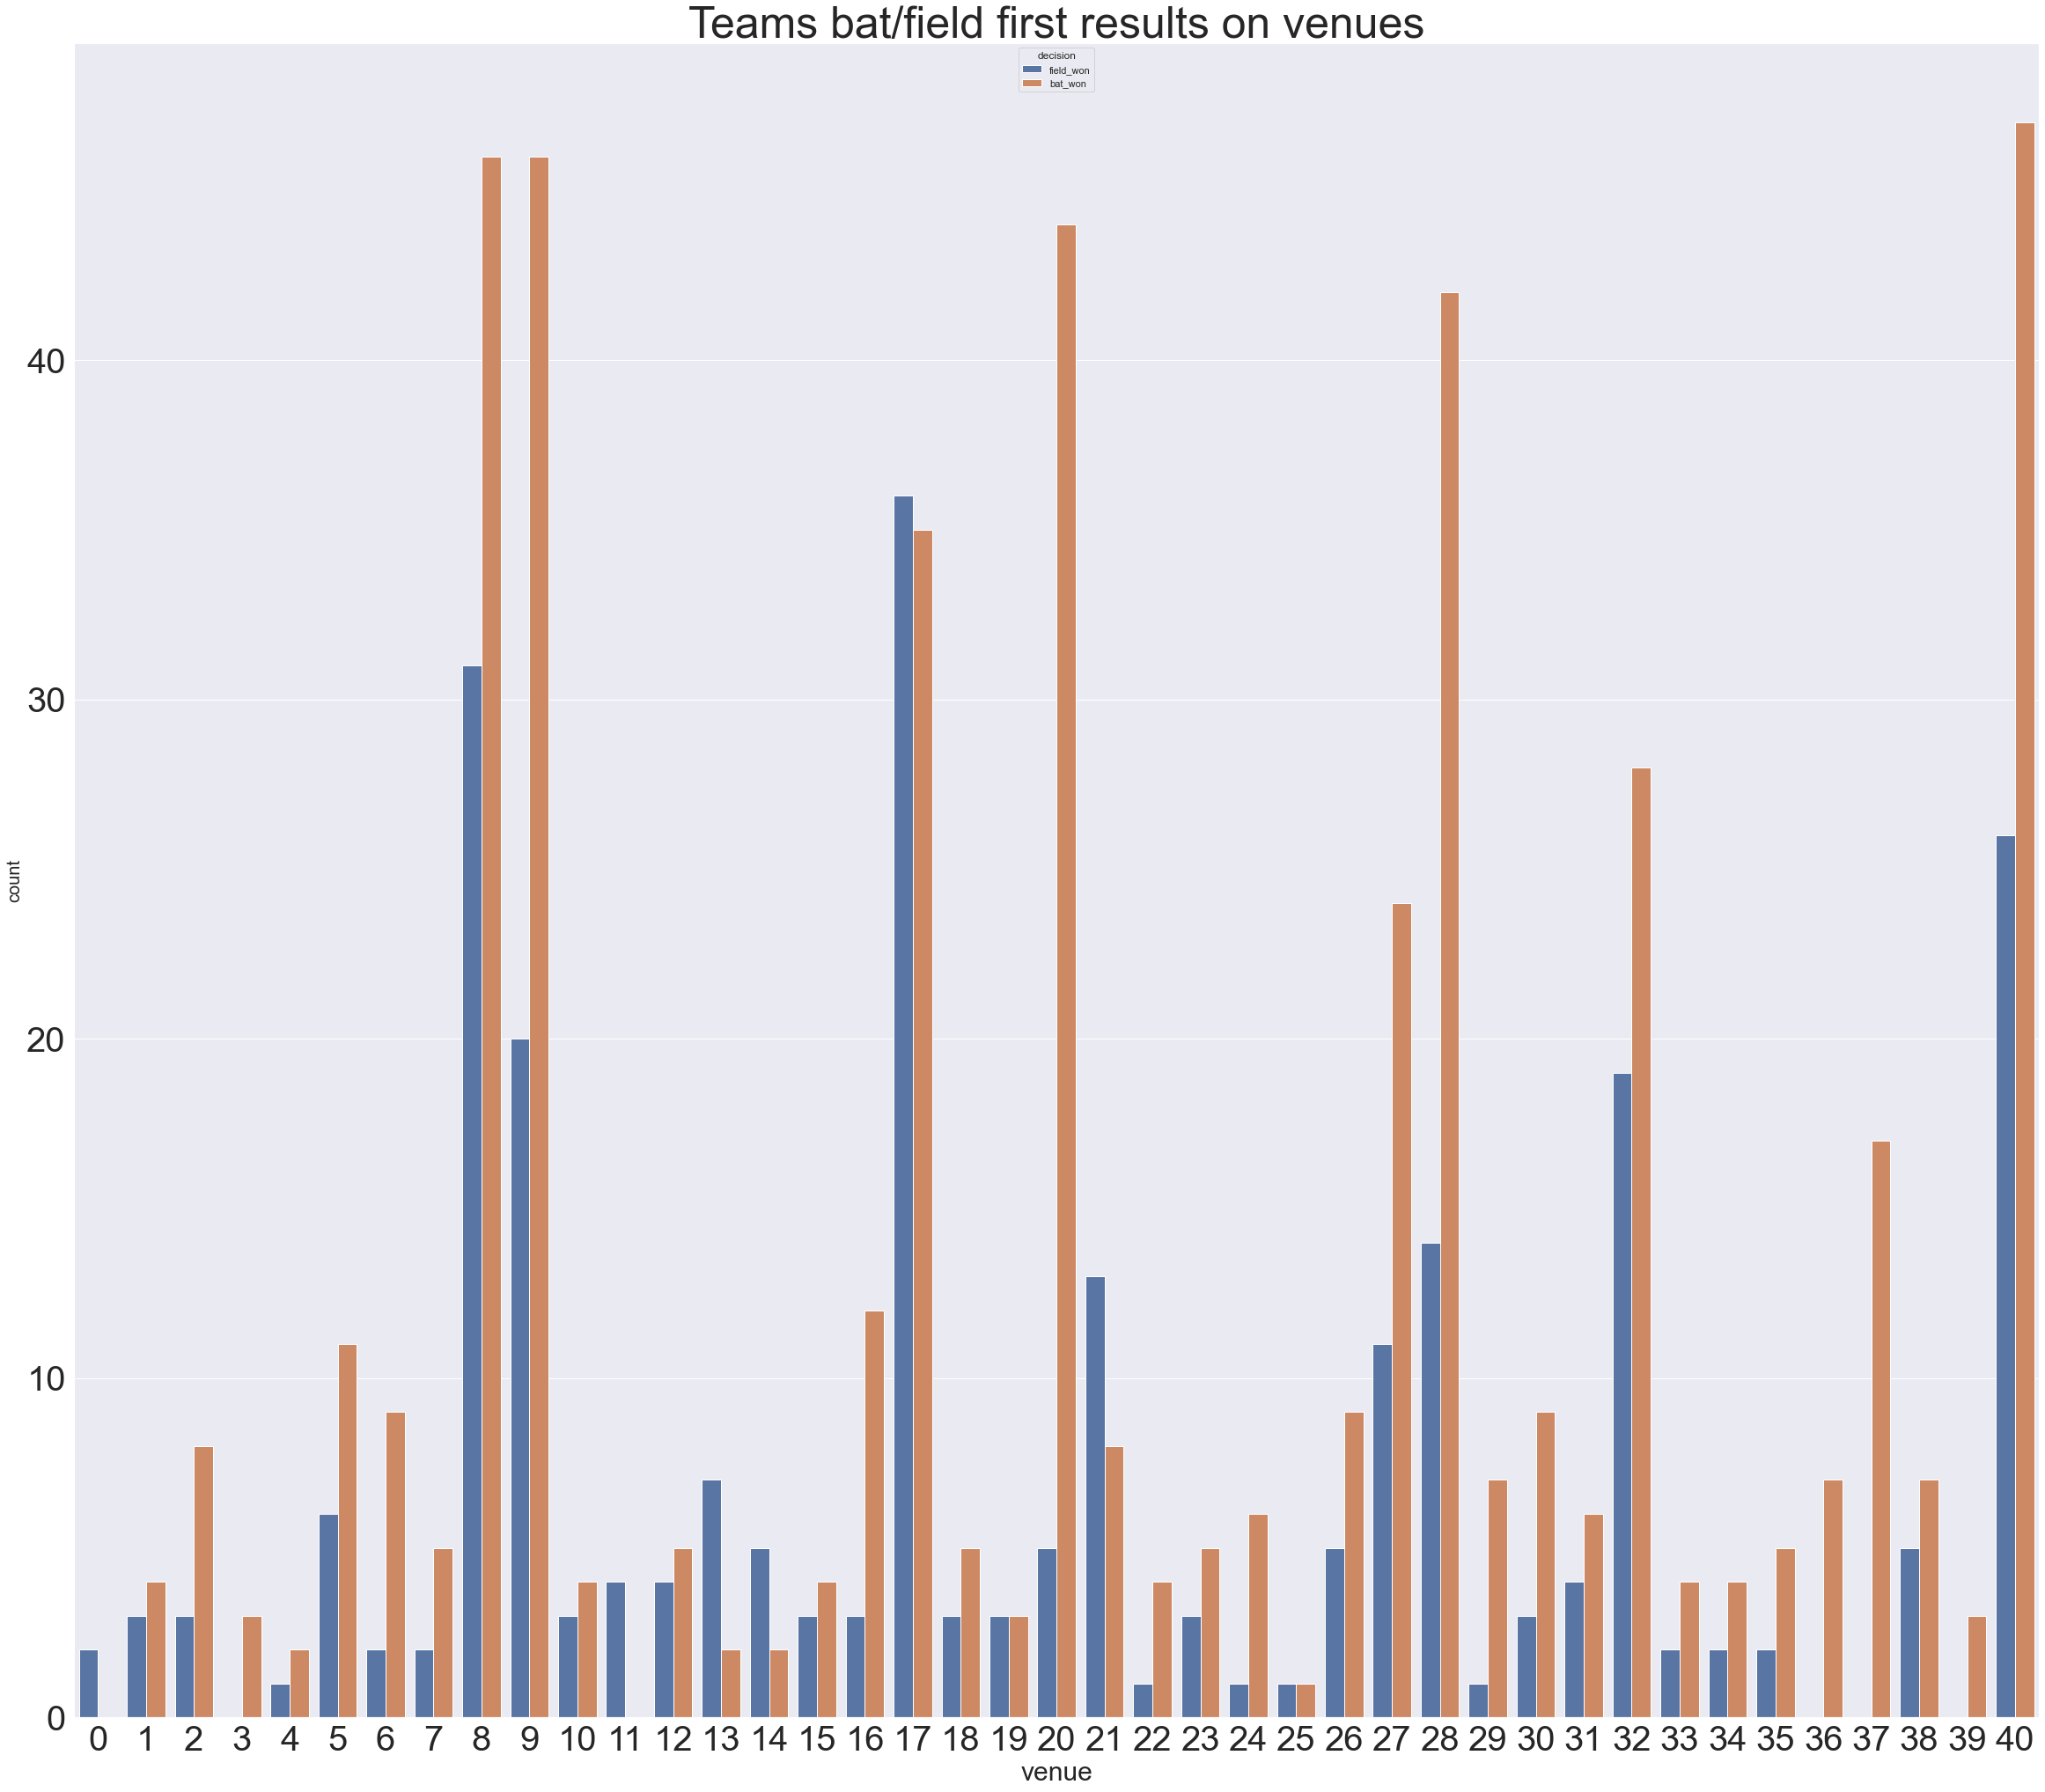

In [94]:
#Visualization

b = sns.barplot(x="venue", y="count", hue="decision", data=venue_result)

plot.set_xticklabels(venue_result['venue'].unique(),rotation=90, fontsize = 40)
b.axes.set_title("Teams bat/field first results on venues",fontsize=50)
b.set_xlabel("venue",fontsize=30)
b.set_ylabel("count",fontsize=20)
b.tick_params(labelsize=40)
plt.show()


C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


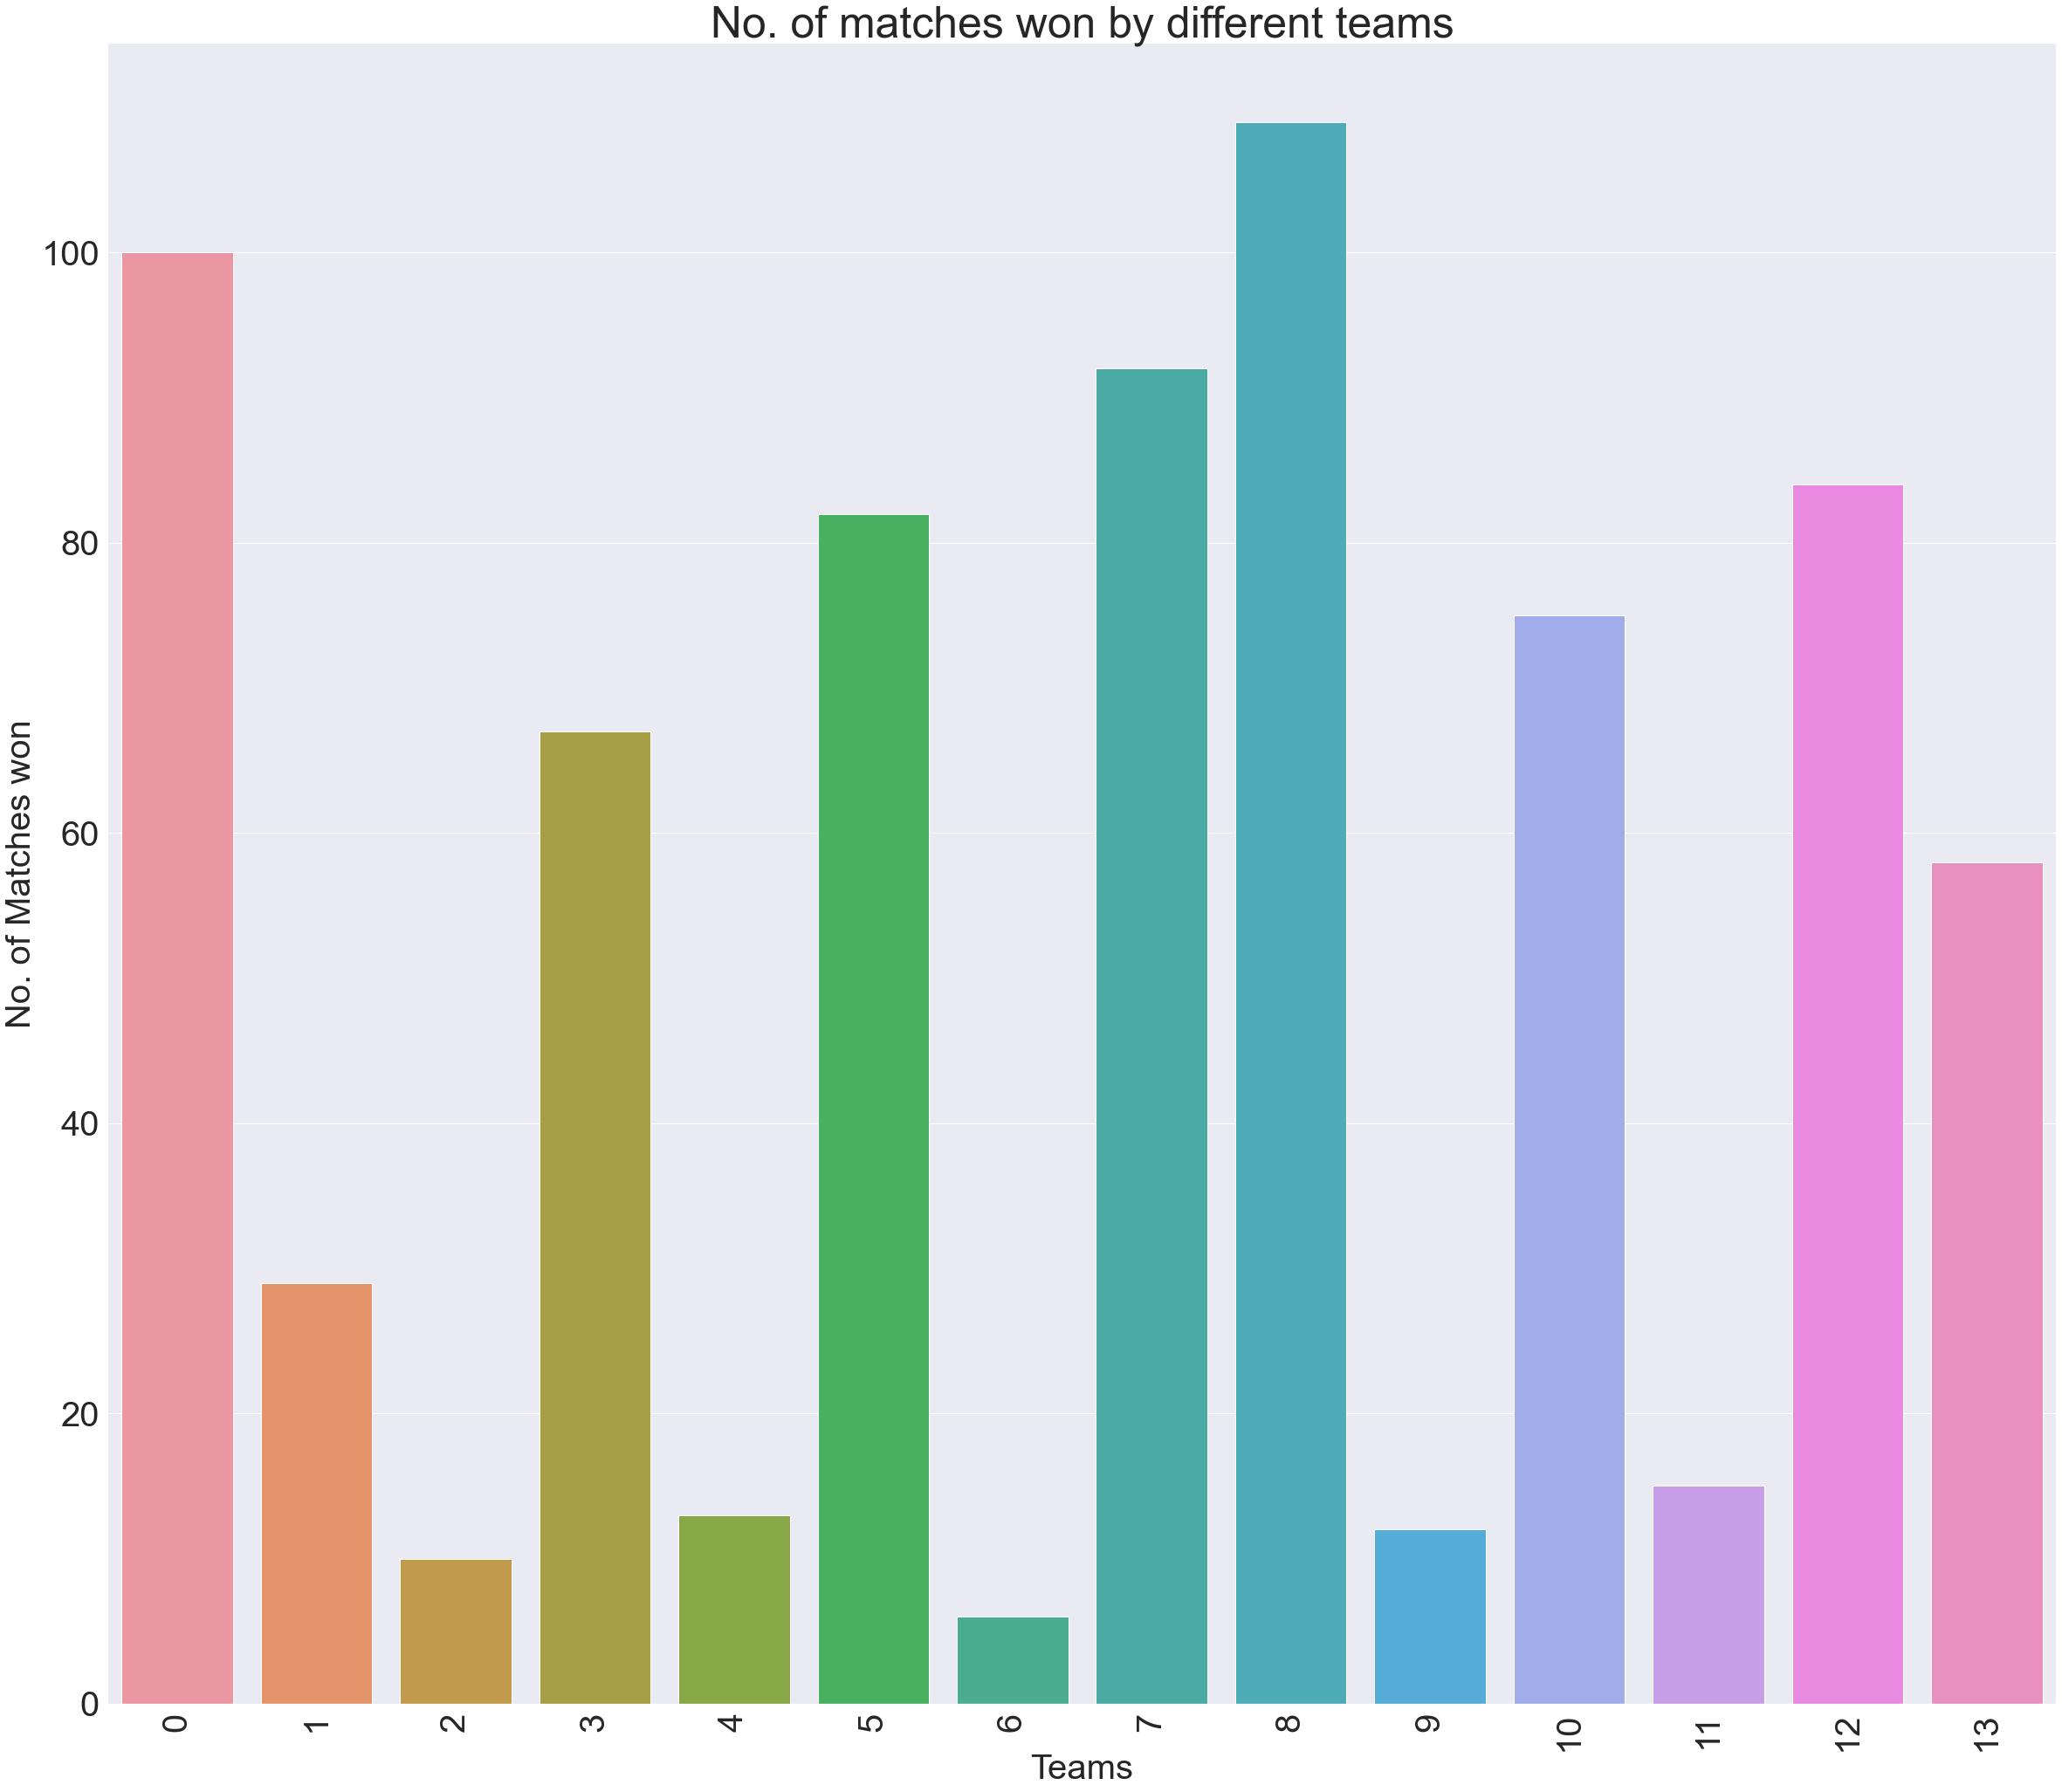

In [96]:
teams = list(set(matches.loc[:,'team1']))
matches_won = [len(matches.loc[matches['winner'] == i]) for i in teams]
v = sns.barplot(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')

v.axes.set_title("No. of matches won by different teams",fontsize=50)
v.set_xlabel("Teams",fontsize=40)
v.set_ylabel("No. of Matches won",fontsize=40)
v.tick_params(labelsize=40)
plt.show()


## DataPreprocessing and  features Engineering

In [19]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]


### finding the higly correlated features

In [20]:
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)



,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,12,3,1.0,1.0,17
...,...,...,...,...,...
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
753,13,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [21]:
correlated_features

{'team1_bat'}

In [22]:
prediction_df.corr()

,team1,team2,team1_toss_win,team1_bat,team1_win,venue
team1,1.000000,-0.108116,-0.116832,-0.116832,-0.017956,0.108240
team2,-0.108116,1.000000,-0.008782,-0.008782,-0.008492,0.084187
team1_toss_win,-0.116832,-0.008782,1.000000,1.000000,0.021521,0.050049
team1_bat,-0.116832,-0.008782,1.000000,1.000000,0.021521,0.050049
team1_win,-0.017956,-0.008492,0.021521,0.021521,1.000000,0.016037
venue,0.108240,0.084187,0.050049,0.050049,0.016037,1.000000


### Feature Scaling

In [23]:
x = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)
x.head()


,team1,team2,team1_toss_win,team1_bat,venue
0,13,12,0.0,0,28
1,8,11,0.0,0,21
2,4,7,0.0,0,31
3,11,5,0.0,0,13
4,12,3,1.0,1,17


In [24]:
target.head()

0    1
1    0
2    0
3    0
4    1
Name: team1_win, dtype: int32

In [25]:
logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg, 20)
rfe = rfe.fit(x, target.values.ravel())
#Checking for the features of they are important
print(rfe.support_)

[ True  True  True  True  True]


C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


## Building Traning and Testing Model

### Splitting the data into training and testing data and scaling it

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, target, train_size = 0.8, test_size=0.2, random_state=0,shuffle=True)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
print(X_train.shape, y_train.shape)

(601, 5) (601,)


In [28]:
print(X_test.shape, y_test.shape)

(151, 5) (151,)


## We can now train various models and compare the performances.

### Logistic Regression

In [29]:
logreg = LogisticRegression()
z = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))



[[93  2]
 [56  0]]
              precision    recall  f1-score   support

           0       0.62      0.98      0.76        95
           1       0.00      0.00      0.00        56

    accuracy                           0.62       151
   macro avg       0.31      0.49      0.38       151
weighted avg       0.39      0.62      0.48       151

Accuracy of Logistic Regression Classifier on test set: 0.6159


In [30]:
z.coef_

array([[-0.05843737, -0.03069603,  0.00446744,  0.00446744,  0.00761026]])

In [31]:
z.intercept_

array([-0.14348707])

In [32]:
z.score(X_train, y_train)

0.5391014975041597

### Manuality check the accuracy

In [33]:
# find the model output according to our model
model_outputs = z.predict(X_train)
model_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
# compare with them targets
y_train

496    0
251    0
97     1
521    0
474    0
      ..
710    1
192    1
632    0
561    1
687    1
Name: team1_win, Length: 601, dtype: int32

In [35]:
# compare to the two variable
model_outputs == y_train

496     True
251     True
97     False
521     True
474     True
       ...  
710    False
192    False
632     True
561    False
687    False
Name: team1_win, Length: 601, dtype: bool

In [36]:
# find out in how many instances we predicted correctly
np.sum(model_outputs == y_train)

324

In [37]:
# get the total number of instances
model_outputs.shape[0]

601

In [38]:
# calculate the accuracy of the model
np.sum((model_outputs == y_train))/model_outputs.shape[0]

0.5391014975041597

In [39]:
# check what were the names of our columns
x.columns.values

array(['team1', 'team2', 'team1_toss_win', 'team1_bat', 'venue'],
      dtype=object)

In [40]:
# save the names of the columns in an ad-hoc variable
feature_name = x.columns.values

In [41]:
# use the coefficients from this table (they will be exported later and will be used in Tableau)
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

In [42]:
# add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(z.coef_)
# display the summary table
summary_table

,Feature name,Coefficient
0,team1,-0.058437
1,team2,-0.030696
2,team1_toss_win,0.004467
3,team1_bat,0.004467
4,venue,0.007610


In [43]:
# move all indices by 1
summary_table.index = summary_table.index + 1

In [44]:
# add the intercept at index 0
summary_table.loc[0] = ['intercept', z.intercept_[0]]

In [45]:
# sort of the df by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,intercept,-0.143487
1,team1,-0.058437
2,team2,-0.030696
3,team1_toss_win,0.004467
4,team1_bat,0.004467
5,venue,0.007610


### Intercepting the coefficient

In [46]:
# create a new Series called: 'Odds ratio' which will show the.. odds ratio of each feature
summary_table['odds_ratio'] = np.exp(summary_table.Coefficient)
# display the df
summary_table

,Feature name,Coefficient,odds_ratio
0,intercept,-0.143487,0.866332
1,team1,-0.058437,0.943237
2,team2,-0.030696,0.969770
3,team1_toss_win,0.004467,1.004477
4,team1_bat,0.004467,1.004477
5,venue,0.007610,1.007639


In [47]:
# sort the table according to odds ratio
summary_table.sort_values('odds_ratio', ascending = False)

,Feature name,Coefficient,odds_ratio
5,venue,0.007610,1.007639
3,team1_toss_win,0.004467,1.004477
4,team1_bat,0.004467,1.004477
2,team2,-0.030696,0.969770
1,team1,-0.058437,0.943237
0,intercept,-0.143487,0.866332


### Decision Tree Classifier

In [48]:
dtree=DecisionTreeClassifier()
p = dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))


[[63 32]
 [27 29]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        95
           1       0.48      0.52      0.50        56

    accuracy                           0.61       151
   macro avg       0.59      0.59      0.59       151
weighted avg       0.62      0.61      0.61       151

Accuracy of decision tree classifier on test set: 0.6093


In [49]:
p.score(X_train, y_train)

0.8835274542429284

In [50]:
y_train

496    0
251    0
97     1
521    0
474    0
      ..
710    1
192    1
632    0
561    1
687    1
Name: team1_win, Length: 601, dtype: int32

In [51]:
model_out = p.predict(X_train)
model_out

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [52]:
model_out == y_train

496     True
251     True
97      True
521     True
474     True
       ...  
710    False
192     True
632     True
561    False
687    False
Name: team1_win, Length: 601, dtype: bool

In [53]:
np.sum(model_out == y_train)

531

In [54]:
model_out.shape[0]

601

In [55]:
# calculate the accuracy of the model
np.sum((model_out == y_train))/model_out.shape[0]

0.8835274542429284

In [56]:
p.score(X_test, y_test)


0.609271523178808

### Random Forest Classifier

In [57]:
randomForest= RandomForestClassifier(n_estimators=100)
k = randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))


Confusion matrix
 [[58 37]
 [28 28]]
              precision    recall  f1-score   support

           0       0.67      0.61      0.64        95
           1       0.43      0.50      0.46        56

    accuracy                           0.57       151
   macro avg       0.55      0.56      0.55       151
weighted avg       0.58      0.57      0.57       151

Accuracy of random forest classifier on test set: 0.5695


In [58]:
k.score(X_train, y_train)

0.8835274542429284

In [59]:
y_train

496    0
251    0
97     1
521    0
474    0
      ..
710    1
192    1
632    0
561    1
687    1
Name: team1_win, Length: 601, dtype: int32

In [60]:
model_output = k.predict(X_train)
model_output

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [61]:
model_output == y_train

496     True
251     True
97      True
521    False
474     True
       ...  
710     True
192     True
632     True
561    False
687    False
Name: team1_win, Length: 601, dtype: bool

In [62]:
np.sum(model_output == y_train)

531

In [63]:
model_output.shape[0]

601

In [64]:
# calculate the accuracy of the model
np.sum((model_output == y_train))/model_output.shape[0]

0.8835274542429284

In [65]:
k.score(X_test, y_test)

0.5695364238410596

### Support Vector Machine

In [66]:
svm=SVC()
l = svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

[[93  2]
 [49  7]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78        95
           1       0.78      0.12      0.22        56

    accuracy                           0.66       151
   macro avg       0.72      0.55      0.50       151
weighted avg       0.70      0.66      0.57       151

Accuracy of SVM classifier on test set: 0.6623


In [67]:
l.score(X_train, y_train)

0.5657237936772047

In [68]:
y_train

496    0
251    0
97     1
521    0
474    0
      ..
710    1
192    1
632    0
561    1
687    1
Name: team1_win, Length: 601, dtype: int32

In [69]:
model_op = l.predict(X_train)
model_op

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
model_op == y_train

496     True
251     True
97     False
521     True
474     True
       ...  
710    False
192    False
632     True
561    False
687    False
Name: team1_win, Length: 601, dtype: bool

In [71]:
np.sum(model_op == y_train)

340

In [72]:
model_op.shape

(601,)

In [73]:
# calculate the accuracy of the model
np.sum((model_op == y_train))/model_op.shape[0]

0.5657237936772047

In [74]:
l.score(X_test, y_test)

0.6622516556291391